In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from fbprophet import Prophet 

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Project Related /RELIANCE__.NS.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,22-01-2020,1544.000000,1546.750000,1531.099976,1533.349976,1527.614014,4719245
1,23-01-2020,1536.500000,1541.949951,1520.699951,1526.849976,1521.138306,5142088
2,24-01-2020,1527.000000,1536.349976,1518.550049,1521.550049,1515.858276,6687633
3,27-01-2020,1514.900024,1524.449951,1505.000000,1506.550049,1500.914307,6120429
4,28-01-2020,1508.599976,1510.000000,1463.599976,1471.750000,1466.244507,11215313
...,...,...,...,...,...,...,...
246,18-01-2021,1949.099976,1997.000000,1923.349976,1983.949951,1983.949951,16198856
247,19-01-2021,1994.650024,2031.000000,1994.650024,2016.400024,2016.400024,14771048
248,20-01-2021,2021.400024,2058.000000,2001.400024,2054.699951,2054.699951,14271669
249,21-01-2021,2082.000000,2120.000000,2075.000000,2099.399902,2099.399902,18038987


In [3]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
df1 = df.drop(["Open","High","Low","Adj Close","Volume"],axis = 1)
df1

,Date,Close
0,22-01-2020,1533.349976
1,23-01-2020,1526.849976
2,24-01-2020,1521.550049
3,27-01-2020,1506.550049
4,28-01-2020,1471.750000
...,...,...
246,18-01-2021,1983.949951
247,19-01-2021,2016.400024
248,20-01-2021,2054.699951
249,21-01-2021,2099.399902


In [5]:
df1.columns = ['ds','y']

In [6]:
m = Prophet()

In [7]:
m.fit(df1)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
future = m.make_future_dataframe(periods = 365)
future.tail()

,ds
611,2022-11-27
612,2022-11-28
613,2022-11-29
614,2022-11-30
615,2022-12-01


In [20]:
pred = m.predict(future)

In [10]:
pred[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
611,2022-11-27,2529.815233,2157.283283,2915.576495
612,2022-11-28,2425.078999,2029.784599,2802.409794
613,2022-11-29,2366.684241,1956.528297,2740.087351
614,2022-11-30,2424.543781,2027.930582,2829.050430
615,2022-12-01,2407.573153,2016.366347,2810.018031


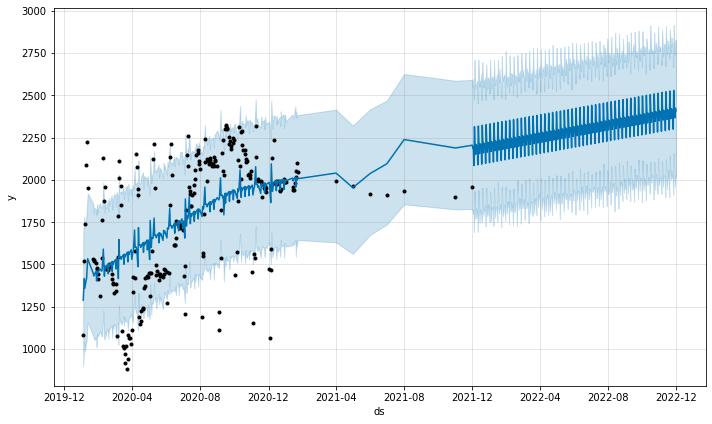

In [11]:
fig1 = m.plot(pred)

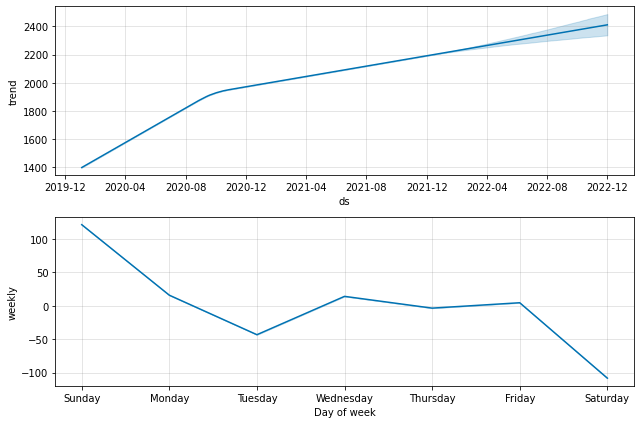

In [12]:
fig2 = m.plot_components(pred)